# Cumulative Precipitation from Surface Runoff Events#
##### Elliott Carver #####

### <u>NOTES
This code reads in a data file which contains daily precipitation values for 4 rain gauges located at our research site ( indiated by column names: 104, 105, 304, 305) plus the local mesonet weather station (located approximatley 0.5 miles away). All missing datas are indicated as NaNs. The 'Average_Precip' column calculates the corrected precipitation value for the given timepoint at the research location. Corrected precipitation is calculated as follows <br/>

- If all research sites are present (i.e. no NaN): Average of sites 104, 105, 304, and 305
- If any research site is missing (i.e. NaN is present): Caluclate average by replacing missing research site value with value from Mesonet  

In [45]:
#Import modules 
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
#Raw data file
dataset_dir = '/Users/Elliott/Desktop/Coding/Project/'
filename = 'DailyData1.csv'

In [32]:
#Import raw data file
precip = pd.read_csv(dataset_dir + filename)
precip['Average_Precip']= np.nan # Adds a new empty (i.e.  NaN filled) column to datafram


In [68]:
# Nan Loop: this loop is a test to determine if each cell is a NaN or not. If a research site (104, 105, 303, or 304) contains a NaN then the average of all five columns is listed under Average_Precip. If no cells contain a Nana, then the average of only the 4 research site columns is computed and reported under the Average_Precip column
for x in range(0, len(precip.Date)):
    if pd.isna(precip['104'][x]) == True | pd.isna(precip['105'][x]) == True | pd.isna(precip['303'][x]) == True | pd.isna(precip['304'][x]) == True:
        precip.Average_Precip[x] = np.mean(precip.iloc[x, 1:6])
    
    else:
        precip.Average_Precip[x] = np.mean(precip.iloc[x, 2:6])

#precip

C:\Users\Elliott\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Elliott\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [34]:
# Dates were initally read in as strings; therefore, dates must be converted using the datetime module
precip['Date'] = pd.to_datetime(precip['Date'], format='%m/%d/%Y')
#precip

In [35]:
# Creates a mask allowing the user to determine which range of dates will be summed together to determine total precipitation.
date_mask = (precip['Date'] >= '3/30/2017') & (precip['Date'] <= '4/17/2017')
#date_mask

In [41]:
# Calculates the sum of all precipitation values for each research site, mesonet location, and the accepted 'Average Precip'
a = precip[date_mask].sum()
total_precip = precip.loc[date_mask,'Average_Precip'].sum()
print('Total precipitation is:', (total_precip))


Total precipitation is: 2.7900000000000005


In [44]:
# Display snipped data frame (i.e. only values for precipitation event) and export datafram to .csv
print(precip[date_mask])

# Export snipped data frame to a .csv
export_csv = precip[date_mask].to_csv(r'/Users/Elliott/Desktop/Total_Precip.csv', index = None, header = True)

         Date  Mesonet  104  105  303   304  Average_Precip
2  2017-03-30     0.14  NaN  NaN  NaN  0.13           0.135
3  2017-03-31     0.00  NaN  NaN  NaN  0.01           0.005
4  2017-04-01     0.07  NaN  NaN  NaN  0.04           0.055
5  2017-04-02     0.07  NaN  NaN  NaN  0.06           0.065
6  2017-04-03     0.73  NaN  NaN  NaN  0.72           0.725
7  2017-04-04     0.97  NaN  NaN  NaN  0.86           0.915
8  2017-04-05     0.29  NaN  NaN  NaN  0.41           0.350
9  2017-04-06     0.00  NaN  NaN  NaN  0.00           0.000
10 2017-04-07     0.00  NaN  NaN  NaN  0.00           0.000
11 2017-04-08     0.00  NaN  NaN  NaN  0.00           0.000
12 2017-04-09     0.00  NaN  NaN  NaN  0.00           0.000
13 2017-04-10     0.00  NaN  NaN  NaN  0.00           0.000
14 2017-04-11     0.00  NaN  NaN  NaN  0.00           0.000
15 2017-04-12     0.14  NaN  NaN  NaN  0.15           0.145
16 2017-04-13     0.05  NaN  NaN  NaN  0.00           0.025
17 2017-04-14     0.08  NaN  NaN  NaN  0

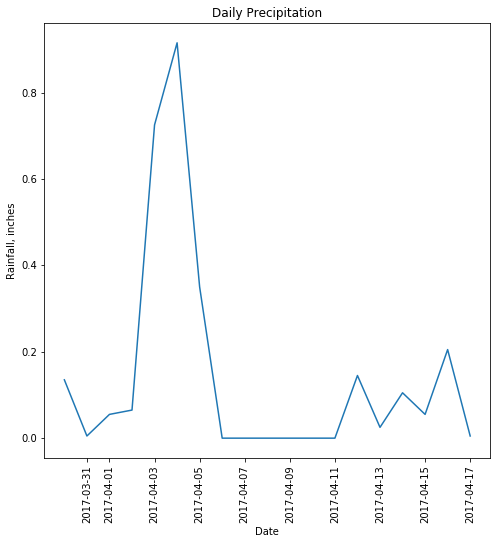

In [67]:
# Graph out daily precipitation totals ('Average_Precip' for given date range)

x_values = (precip[date_mask].Date)
y_values = (precip[date_mask].Average_Precip)

plt.figure(figsize=(8,8)) #Set size of figure at 8" x 8"
plt.plot(x_values, y_values)
plt.xticks(rotation = 90) #Rotates values along x-axis to make them easier to read
plt.xlabel('Date')
plt.ylabel('Rainfall, inches')
plt.title('Daily Precipitation')
plt.show()